<a href="https://colab.research.google.com/github/Evanaxander/Predicting-Stars-Galaxies-Quasars-with-ML-/blob/main/Predicting_Stars%2C_Galaxies_%26_Quasars_with_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





* **Galaxies** tend to have moderate redshift and specific brightness patterns across filters.
* **Quasars** have very high redshift and unique brightness characteristics.


* **Stars** are relatively close and have different magnitudes across filters.






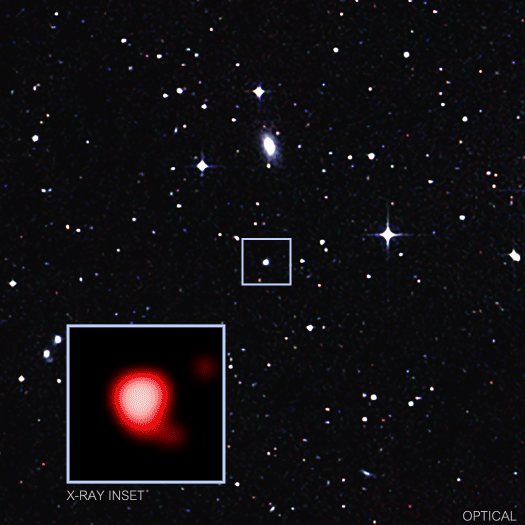

# About the Problem & the Dataset

**So what exactly are stars, galaxies, and quasars?**

A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.

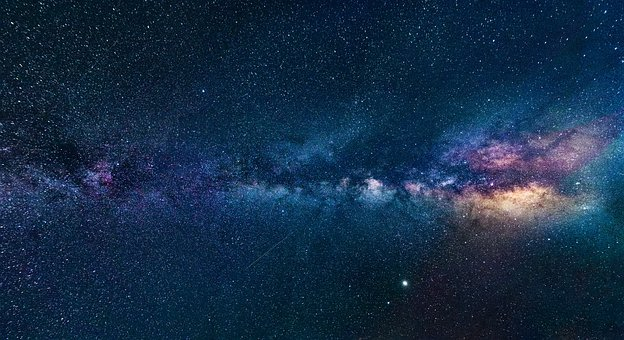

A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

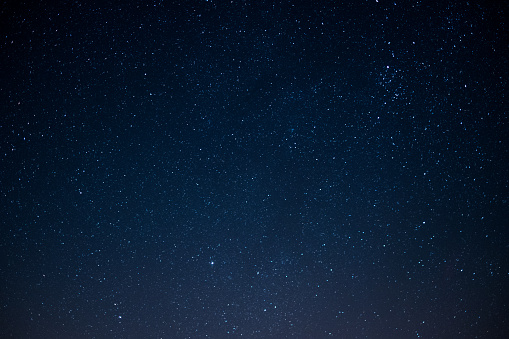

A QUASAR, also known as a quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. A typical quasar is 27 trillion times brighter than our sun! If you were to place a quasar at the distance of Pluto, it would vaporise all of Earth’s oceans to steam in a fifth of a second.

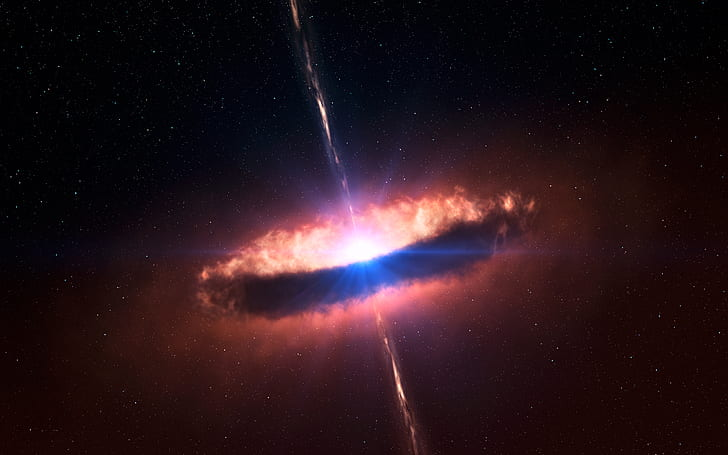

The dataset we'll be using for this model is the Sloan Digital Sky Survey DR14

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. 30% of it is used in testing the model performance and 70% in training of the model.

# Importing necessary libraries and modules for the dataset
**First of all we need to import all the packages we need. Numpy and Pandas for data manipulation and all the modules from sklearn for the machine learning feature**

In [ ]:


#Operating System Functionality
import os

#Data Handling & Linear Algebra
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Manipulating Data and Model Building
import tensorflow as tf
from tensorflow import keras

#Data Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Measuring Classification Performance
from sklearn.metrics import accuracy_score

#Classification & Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
#Importing the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Exploratory Analysis

In [ ]:
folder = "D:\Evan\digital sky"
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [ ]:
data.shape

(10000, 18)

In [ ]:
#Displaying the first 5 rows of the dataset
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**The object id columns are of little use in the analysis hence we can delete them from the dataset.**

In [ ]:
#Drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [ ]:
#Data after dropping columns
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [ ]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
#Checking for null values to determine completeness of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


No missing data so the dataset is complete with no voids and missing cells

**The Target from data is Data classification to Star Galaxy or Quasar, so the class column has 3 Categories and in this case we need to convert them into numeric data.**

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder().fit encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier


In [ ]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

**Why is this needed?**
Machine learning models do not work with categorical (string) labels directly.
Label encoding replaces text labels with numerical values so that they can be used in ML algorithms.

# The Final Dataset

In [ ]:
#Printing the dataset after all the changes to check the dataset
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


**After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2**

In [ ]:
X = data.drop('class', axis=1)
y = data['class']

# Data Scaling

Scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1). StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [ ]:
#Show data
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

# Density Distribution Plots

<Axes: xlabel='class', ylabel='count'>

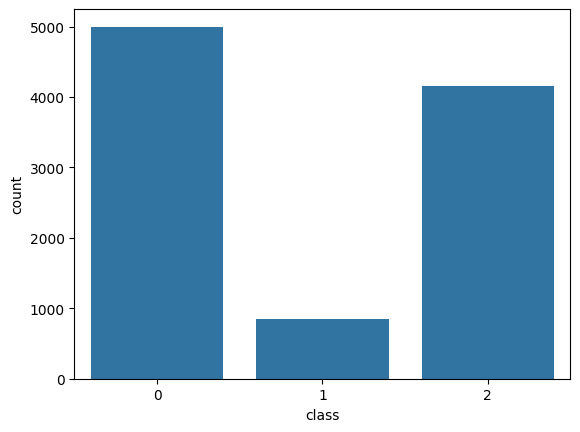

In [ ]:
#Checking the number of labels for each class of the dataset where 0 = Galaxy, 1 = Quasar, 2 = Star.
sns.countplot(x=data['class'])

# Some information about the filters used while gathering the data:

"U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

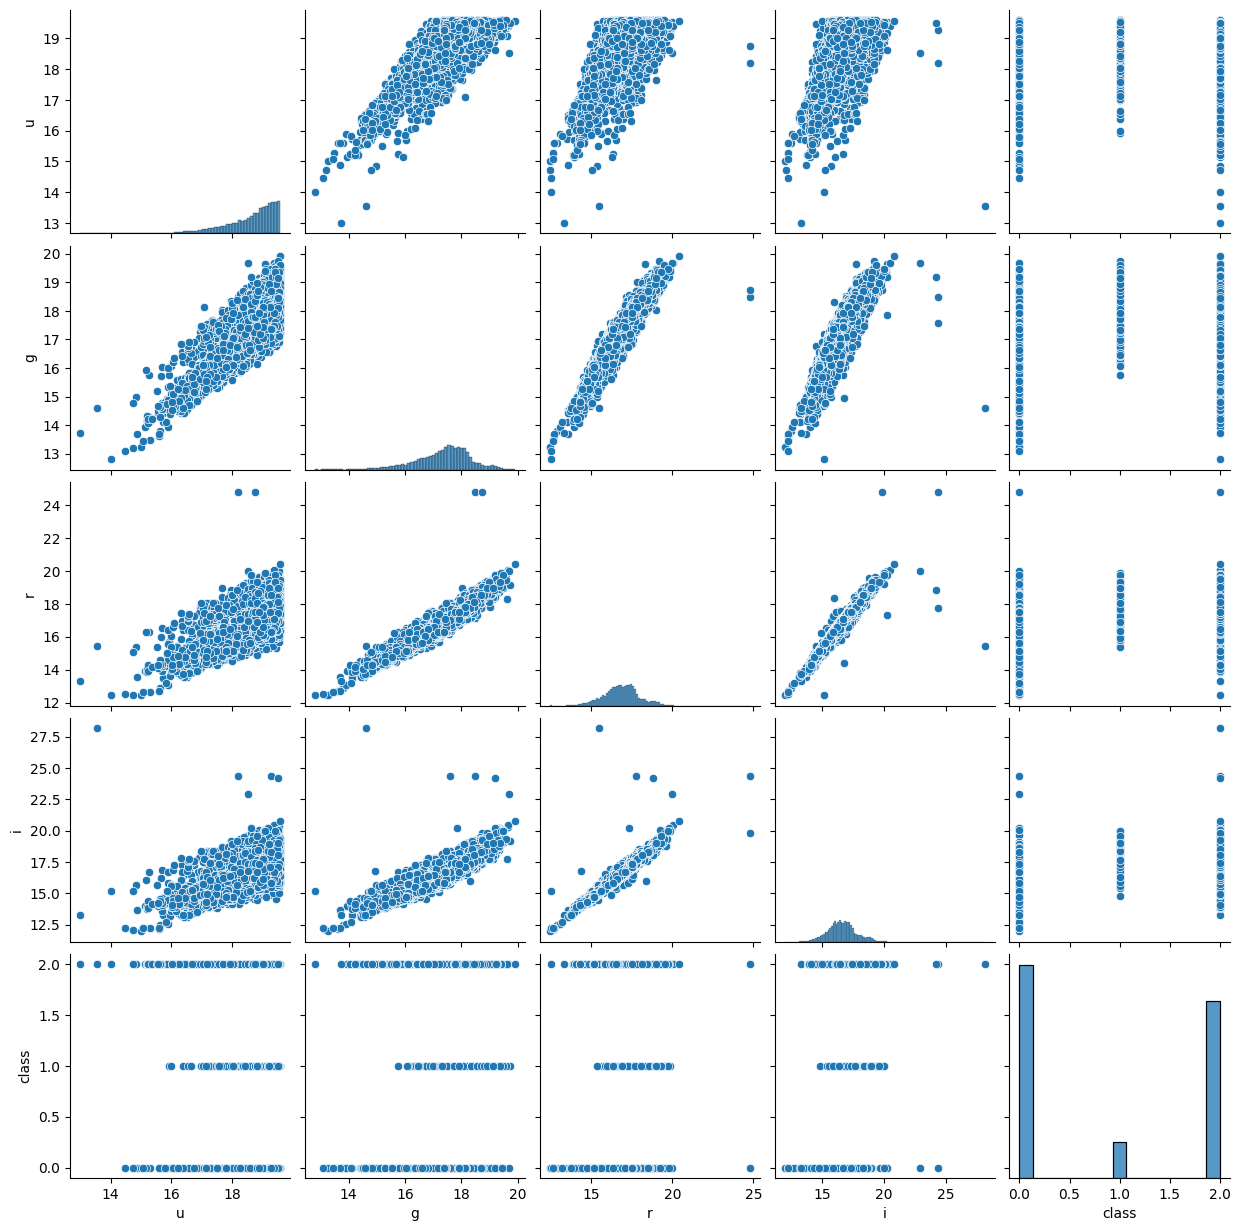

In [ ]:
#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(data[['u','g','r','i','class']])

**Key Observations:**

u, g, r, and i are positively correlated, meaning as one increases, the other also tends to increase.

The class feature shows clear separations, indicating that these features are useful for classification.

Some scatter plots show a strong linear trend, while others have a more spread-out distribution.

**Feature & Label Selection**

In [ ]:
X = data.drop('class', axis=1)
y = data['class']

**Standardizing the Data**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Splitting into Training and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

# Why use the Decision Tree Algorithm?
The Decision Tree Classifier was chosen for this problem because it is well-suited for classifying astronomical objects (Stars, Galaxies, and Quasars) based on their numerical features like magnitudes, redshift, and celestial coordinates.

**Example of How a Decision Tree Works for this**

If redshift < 0.5, it's likely a star.
If redshift > 2.0, it's likely a quasar.
If 0.5 < redshift < 2.0 and r magnitude is high, it's likely a galaxy.

**Train the Decision Tree Classifier**

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Plot the Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

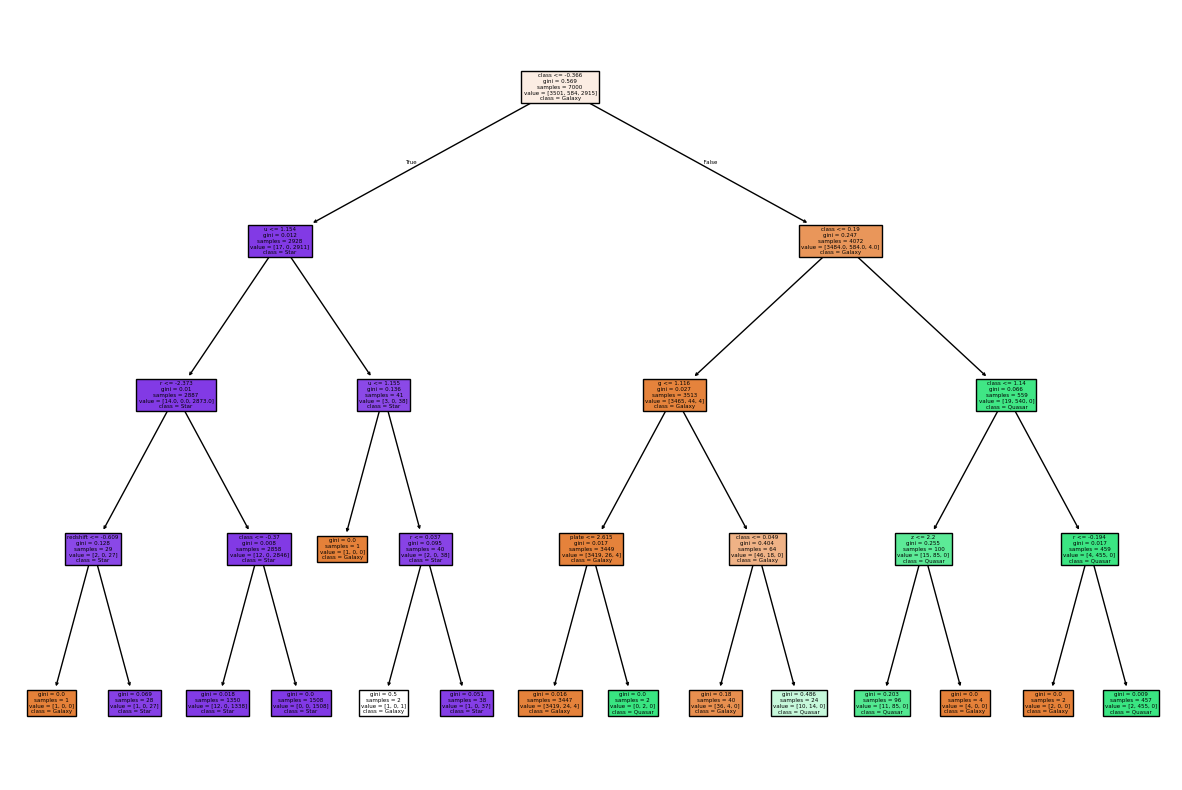

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=data.columns[:-1], class_names=["Galaxy", "Quasar", "Star"])
plt.show()

# Feature Correlation for Selection

**Compute Correlation Matrix**

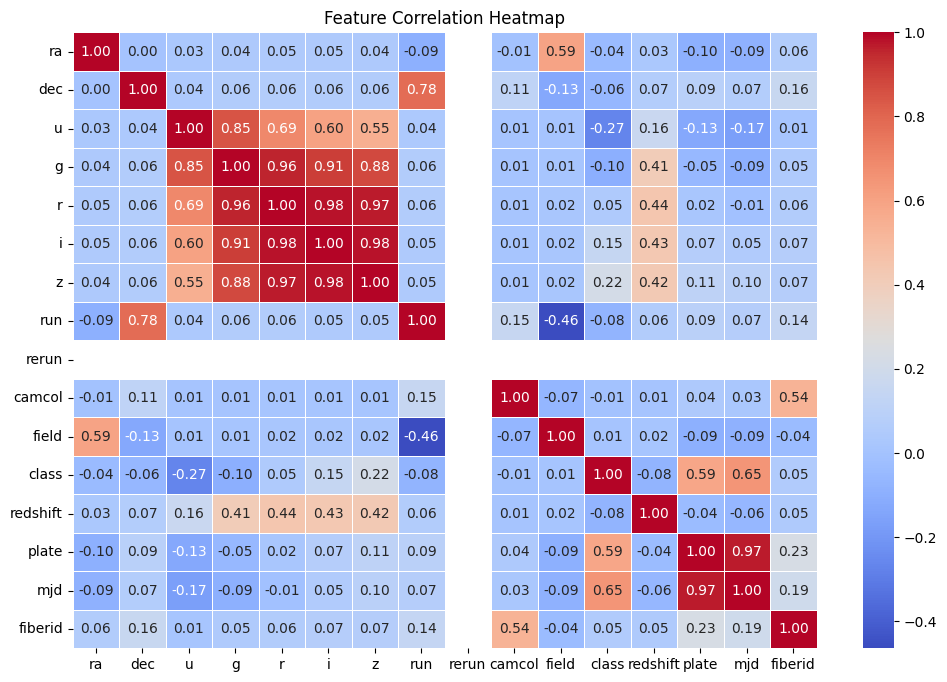

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# What the Heatmap Shows:
**Color Representation:**

**Red** (Closer to +1) → Strong positive correlation (one feature increases, the other also increases).

**Blue **(Closer to -1) → Strong negative correlation (one feature increases, the other decreases).

**White or light colors** (Closer to 0) → Weak or no correlation.
Diagonal Elements (1.00) → Each feature is perfectly correlated with itself.

**Highly Correlated Features:**

Features like g, r, i, and z are strongly correlated (values close to 1.00).
dec and run have a strong correlation (0.78), indicating a relationship.
Weakly Correlated Features:

class has weak correlations with most features.
ra and run show a negative correlation (-0.09), meaning they vary inversely.


# Custom Prediction Function

**Astronomical features used in the dataset to classify objects as Stars, Galaxies, or Quasars**


1️⃣ **Right Ascension (ra)**



**Definition:** The celestial equivalent of longitude, measuring the object's position in the sky.
**Unit:** Degrees (°).
**Importance:** Helps locate objects in the sky.

2️⃣ **Declination (dec)**

Definition: The celestial equivalent of latitude, measuring how far an object is from the celestial equator.
Unit: Degrees (°).
Importance: Helps determine if an object is in the northern or southern celestial hemisphere.

3️⃣ **Ultraviolet Magnitude (u)**

Definition: The brightness of the object in the ultraviolet (u) filter.
Unit: Magnitude (lower = brighter).
Importance: Helps in identifying object type based on UV radiation.

4️⃣**Green Magnitude (g)**

Definition: The brightness of the object in the green (g) filter.
Unit: Magnitude.
Importance: Useful for differentiating between hot and cool objects.

5️⃣ **Red Magnitude (r)**

Definition: The brightness of the object in the red (r) filter.
Unit: Magnitude.
Importance: Helps measure how red an object is (important for detecting galaxies and quasars).

6️⃣ **Infrared Magnitude (i)**

Definition: The brightness of the object in the infrared (i) filter.
Unit: Magnitude.
Importance: Helps detect cooler objects like distant galaxies.

7️⃣ **Near-Infrared Magnitude (z)**

Definition: The brightness of the object in the near-infrared (z) filter.
Unit: Magnitude.
Importance: Helps distinguish between stars and quasars.

8️⃣**Redshift**

Definition: The change in wavelength of light due to the Doppler effect, indicating how far an object is from Earth.
Unit: Dimensionless (higher value = farther away).
Importance:

Stars → Low redshift (nearby).
Galaxies → Moderate redshift.
Quasars → Very high redshift (distant).




In [ ]:

def predict_object(ra, dec, u, g, r, i, z, run, rerun, camcol, field, redshift, plate, mjd, fiberid):
    """ Predicts if an object is a Star, Quasar, or Galaxy based on input features """

    # Standardize the inputs using the same scaler
    input_features = np.array([[ra, dec, u, g, r, i, z, run, rerun, camcol, field, redshift, plate, mjd, fiberid]])
    input_features = scaler.transform(input_features)  # Transform using the same scaler

    # Predict
    prediction = tree_model.predict(input_features)[0]

    # Mapping class labels
    labels = {0: "Galaxy", 1: "Quasar", 2: "Star"}

    return f"Predicted Object: {labels[prediction]}"


# **Example of Outcome on giving input**

In [ ]:
# Example input values (ensure all 15 features are provided)
prediction_result = predict_object(195.0, 0.0, 22.1, 21.5, 20.3, 19.7, 18.8,
                                   301, 301, 2, 537, 0.5, 266, 52000, 187)

print(prediction_result)


Predicted Object: Quasar


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have y_true (actual labels) and y_pred (predicted labels)
accuracy = accuracy_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.2f}')
